In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D 

%matplotlib inline

In [2]:
customer_data = pd.read_csv("Mall_Customers.csv")

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Preprocessing

In [4]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Checking Null Values

In [5]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Checking Duplicates

In [6]:
customer_data.duplicated().sum()

0

## Checking Attributes

In [7]:
customer_data.shape

(200, 5)

In [8]:
customer_data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
customer_data.index

RangeIndex(start=0, stop=200, step=1)

## Droping CustomerID

In [11]:
#customer_data.drop(["CustomerID",axis=1,inplace=True)
customer_data.drop(columns="CustomerID",axis=1,inplace=True)

In [12]:
customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Exploratory Data Analysis

## Histogram Plot with Density plot == Distribution Plot 
- Kde property is used for density plots
- distplot doesn't work with suplots instead using histplot¶

In [20]:
_column = customer_data.columns[1:]

/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

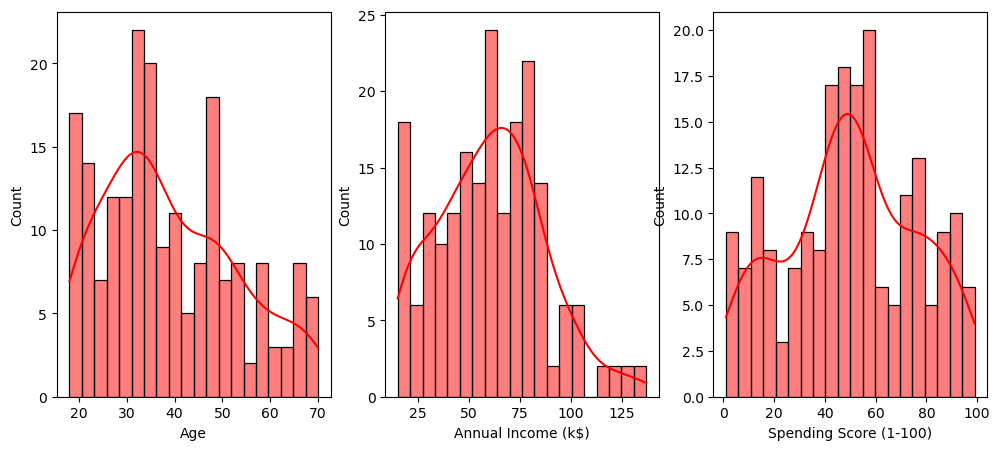

In [54]:
fig, ax = plt.subplots(1,3,figsize = (12,5))

for index,value in enumerate(list(_column)):
    sns.histplot(customer_data[value],bins = 20,ax=ax[index], kde=True,color="r")

Looking into the Histogram Plot, High number of customer are in their 30's-40's

## Count Plot

/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='count', ylabel='Gender'>

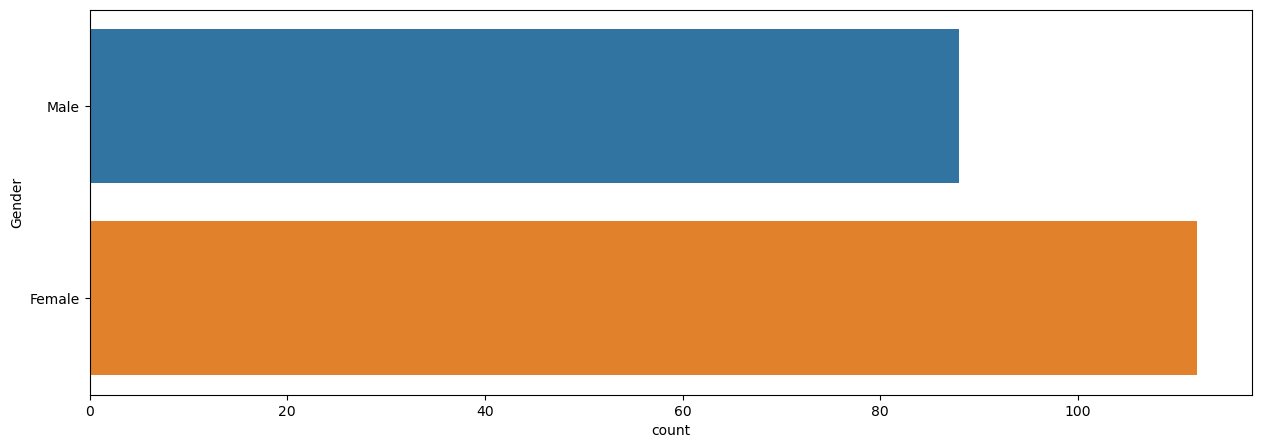

In [51]:
fig = plt.figure(figsize=(15,5))
sns.countplot(data = customer_data, y = 'Gender')

## ViolinPlot

/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categoric

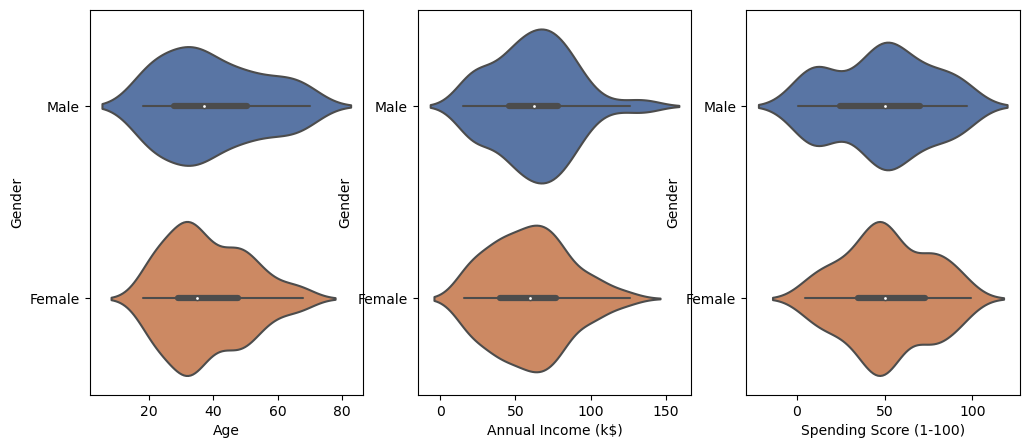

In [60]:
fig, ax = plt.subplots(1,3,figsize = (12,5))
sns.set(style = "whitegrid")
for index,value in enumerate(list(_column)):
    sns.violinplot(data = customer_data,y='Gender',x = value,ax=ax[index])


## Dividing AGE Group for BOX Plot

/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype i

Text(0, 0.5, 'Number of Customer')

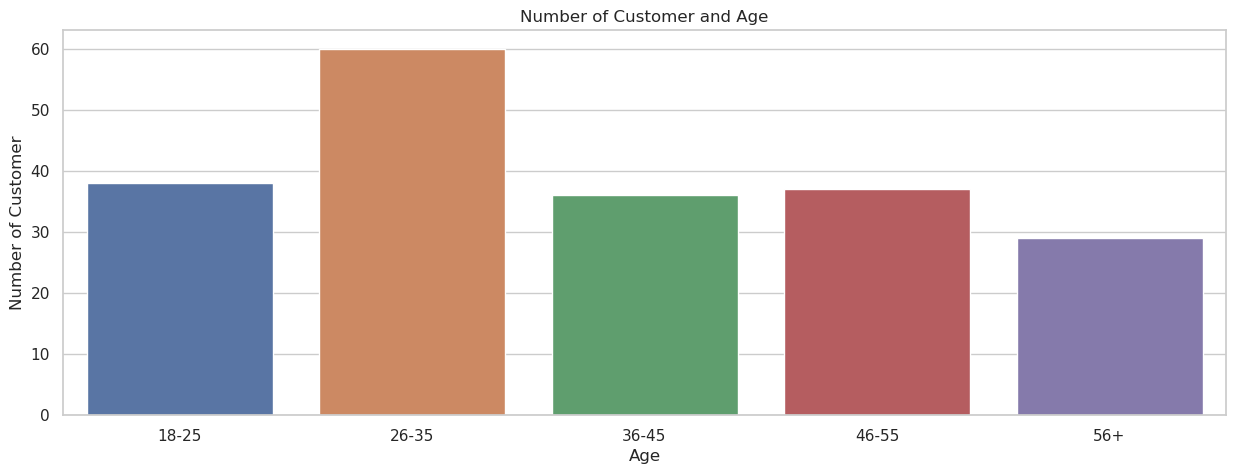

In [69]:
age_18_25 = customer_data.Age[(customer_data.Age >= 18) & (customer_data.Age <= 25)]
age_26_35 = customer_data.Age[(customer_data.Age >= 26) & (customer_data.Age <= 35)]
age_36_45 = customer_data.Age[(customer_data.Age >= 36) & (customer_data.Age <= 45)]
age_46_55 = customer_data.Age[(customer_data.Age >= 46) & (customer_data.Age <= 55)]
age_56_above = customer_data.Age[customer_data.Age >= 56]

agex = ["18-25","26-35","36-45","46-55","56+"]
agel = [age_18_25,age_26_35,age_36_45,age_46_55,age_56_above]
agey = [len(val.values) for val in agel]

fig = plt.figure(figsize = (15,5))
sns.barplot(data = customer_data, x = agex, y = agey)
plt.title("Number of Customer and Age")
plt.xlabel("Age")
plt.ylabel("Number of Customer")

## Relation Plot

/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categoric

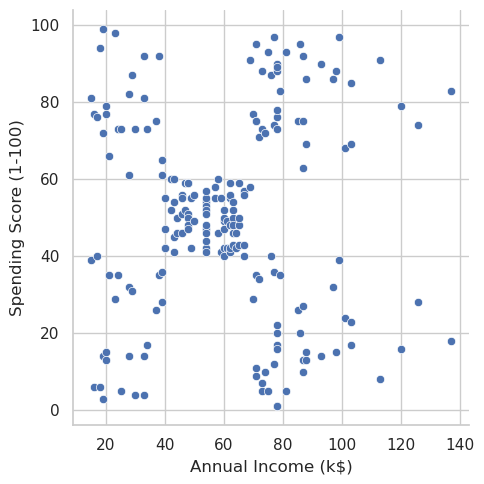

In [71]:
sns.relplot(data = customer_data,x = "Annual Income (k$)",y="Spending Score (1-100)")

There's is no relation between 20-40 or 70-140

/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype i

Text(0, 0.5, 'Number of Customer having the score')

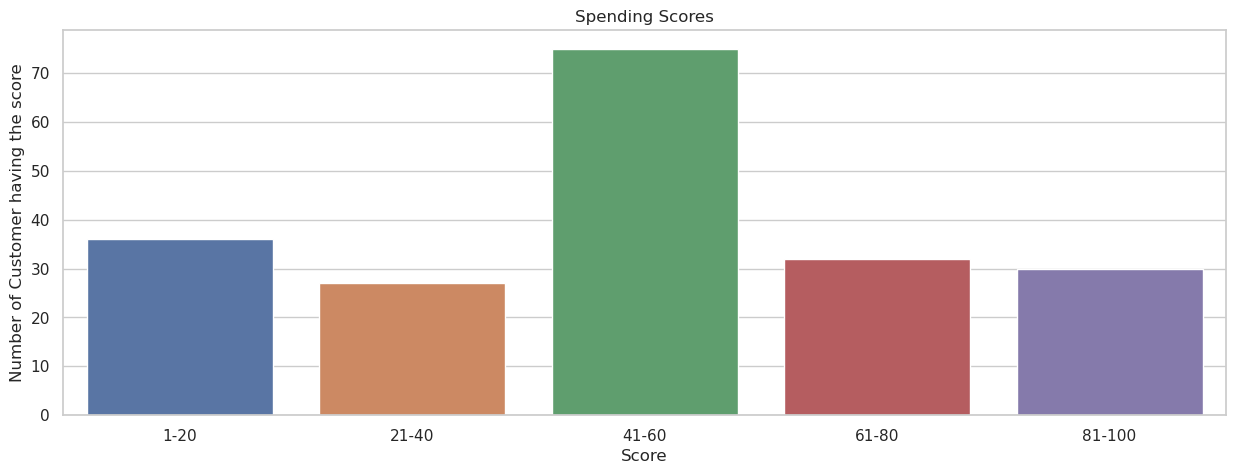

In [75]:
ss_1_20 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"]>=1) & (customer_data["Spending Score (1-100)"]<=20)]
ss_21_40 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"]>=21) & (customer_data["Spending Score (1-100)"]<=40)]
ss_41_60 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"]>=41) & (customer_data["Spending Score (1-100)"]<=60)]
ss_61_80 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"]>=61) & (customer_data["Spending Score (1-100)"]<=80)]
ss_81_100 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"]>=81) & (customer_data["Spending Score (1-100)"]<=100)]

ssx = ["1-20","21-40","41-60","61-80","81-100"]
ssl = [ss_1_20,ss_21_40,ss_41_60,ss_61_80,ss_81_100]
ssy = [len(val.values) for val in ssl]

fig = plt.figure(figsize = (15,5))
sns.barplot(data = customer_data, x = ssx, y = ssy)
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer having the score")

/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype i

<Axes: >

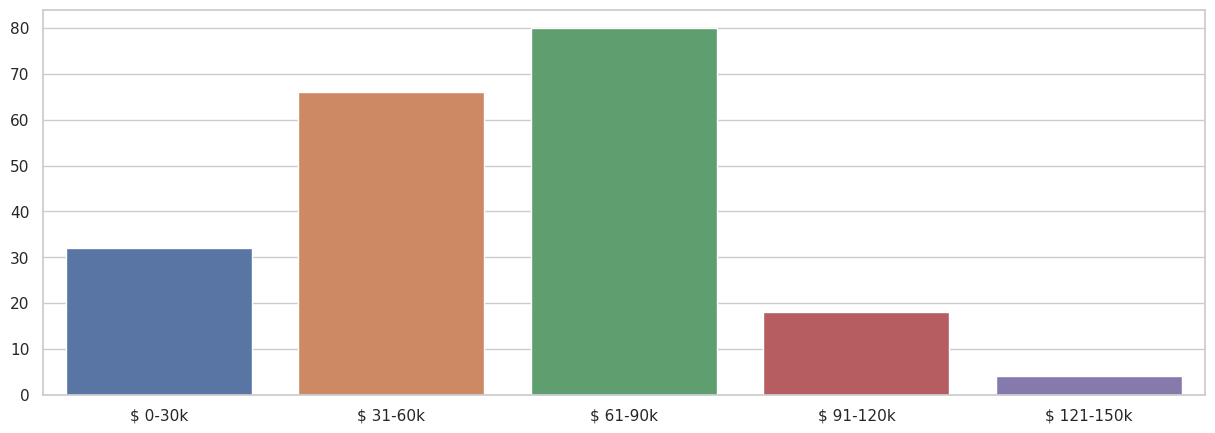

In [78]:
ai_0_30 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"]>=1) & (customer_data["Annual Income (k$)"]<=30)]
ai_31_60 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"]>=31) & (customer_data["Annual Income (k$)"]<=60)]
ai_61_90 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"]>=61) & (customer_data["Annual Income (k$)"]<=90)]
ai_91_120 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"]>=91) & (customer_data["Annual Income (k$)"]<=120)]
ai_121_150 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"]>=121) & (customer_data["Annual Income (k$)"]<=150)]

aix = ["$ 0-30k","$ 31-60k","$ 61-90k","$ 91-120k","$ 121-150k"]
ail = [ai_0_30,ai_31_60,ai_61_90,ai_91_120,ai_121_150]
aiy = [len(val.values) for val in ail]

fig = plt.figure(figsize = (15,5))
sns.barplot(data = customer_data, x = aix, y = aiy)

# Data Modelling

## Finding Optimal Number of Cluster
wcss = Within Cluster Sum of Square

Within-cluster sum of squares (WCSS) is a metric used to evaluate the performance of a clustering algorithm, such as K-means. It measures the compactness or cohesion of the clusters.
In simple terms, WCSS quantifies the total amount of variation or dispersion within the clusters. Lower values of WCSS indicate tighter, more compact clusters.

In practice, the goal of clustering algorithms like K-means is to minimize the WCSS. This is because a lower WCSS generally implies that the clusters are well-separated and that the data points within each cluster are close to their respective centroids.

### There is certain difference between squared euclidean distance and a euclidean distance
the Euclidean distance does indeed involve taking the square root, whereas the squared Euclidean distance is obtained by omitting the square root operation.

# Cluster fo Age and Spending Score

/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4

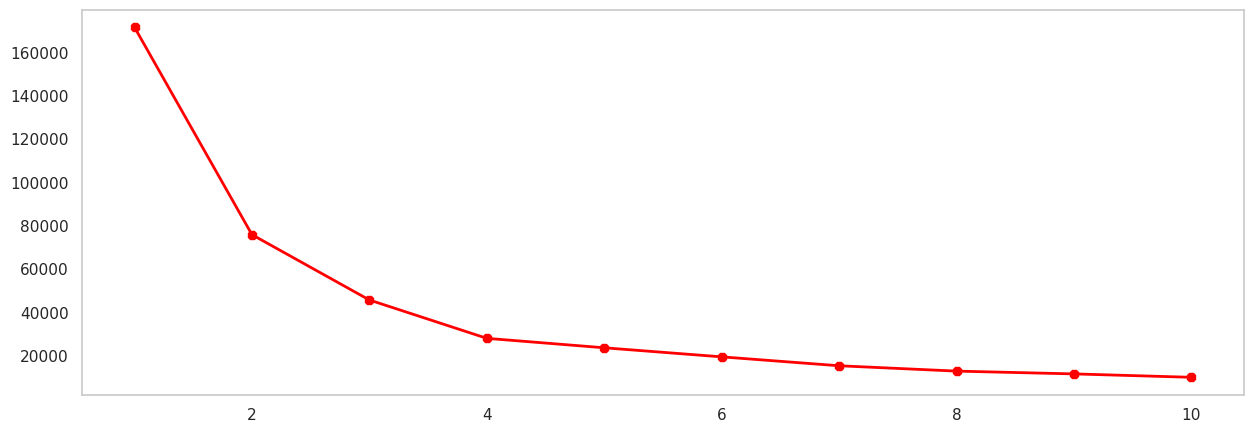

In [84]:
#X1 = customer_data.loc[:,["Age","Spending Score (1-100)","Annual Income (k$)"]].values

X1 = customer_data.loc[:,["Age","Spending Score (1-100)"]].values

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)  #This Calculates the WCSS

plt.figure(figsize = (15,5))
plt.grid()
plt.plot(range(1,11),wcss,linewidth = 2, color = "red", marker = "8")
plt.show()


This Graph is called as Elbow Graph.

### Looking into into the Elbow Graph, We can take 4 as a optimal value for clustering.

### To get the cluster centers and labels for each data point,

kmeans = KMeans(n_clusters=4, random_state=42)

kmeans.fit(X)

centers = kmeans.cluster_centers_ 

labels = kmeans.labels_

In [89]:
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(X1)
print(label)

[1 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 1 1 0 2 1 2 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0
 2 0 2 3 2 3 1 0 1 3 1 1 1 3 1 1 3 3 3 3 3 1 3 3 1 3 3 3 1 3 3 1 1 3 3 3 3
 3 1 3 1 1 3 3 1 3 3 1 3 3 1 1 3 3 1 3 1 1 1 3 1 3 1 1 3 3 1 3 1 3 3 3 3 3
 1 1 1 1 1 3 3 3 3 1 1 1 2 1 2 3 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 3 2
 0 2 0 2 0 2 0 2 0 2 0 2 3 2 0 2 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 1
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


we can see our 200 row data are converted into 4 clusters as [0,1,2,3]

In [91]:
kmeans.cluster_centers_

array([[43.29166667, 15.02083333],
       [27.61702128, 49.14893617],
       [30.1754386 , 82.35087719],
       [55.70833333, 48.22916667]])

Text(0.5, 1.0, 'Clusters of Customers')

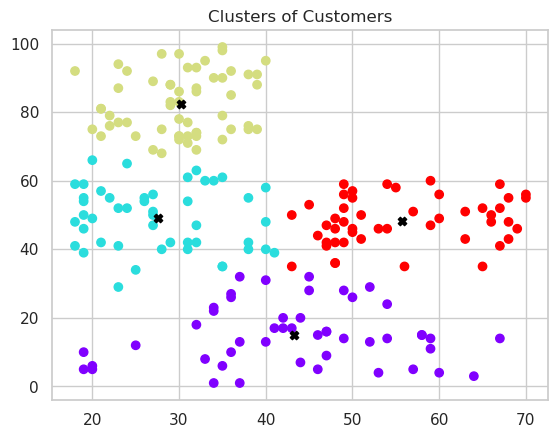

In [102]:
plt.scatter(X1[:,0], X1[:,1], c = kmeans.labels_, cmap="rainbow" )
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = "black",marker="X")

plt.title("Clusters of Customers")
plt.show()

# Clustering for Annual Income and Spending Hour

/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4

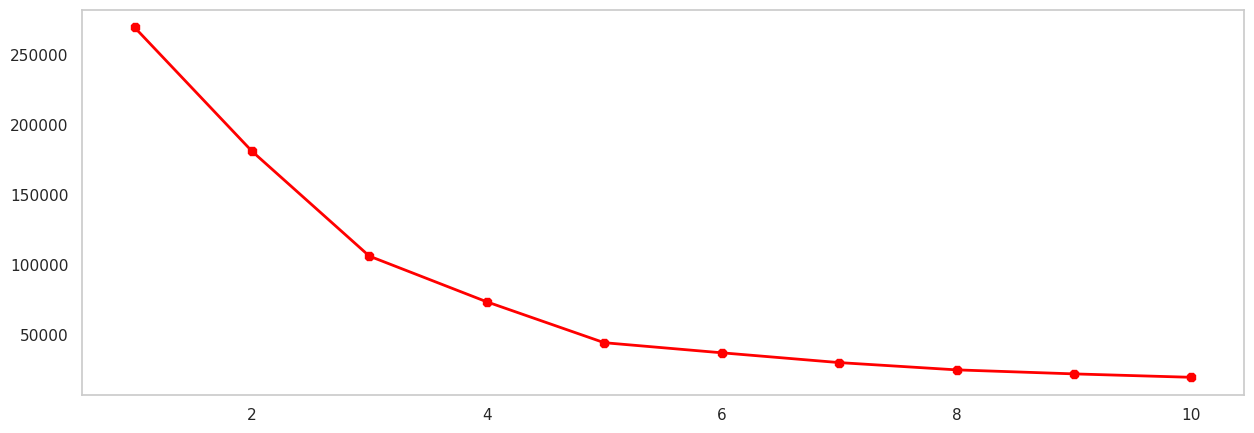

In [109]:
X2 = customer_data.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)  #This Calculates the WCSS

plt.figure(figsize = (15,5))
plt.grid()
plt.plot(range(1,11),wcss,linewidth = 2, color = "red", marker = "8")
plt.show()


In [110]:
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict(X2)
print(label)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 2 3 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 4 1 4 2 4 1 4 1 4 2 4 1 4 1 4 1 4 1 4 2 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


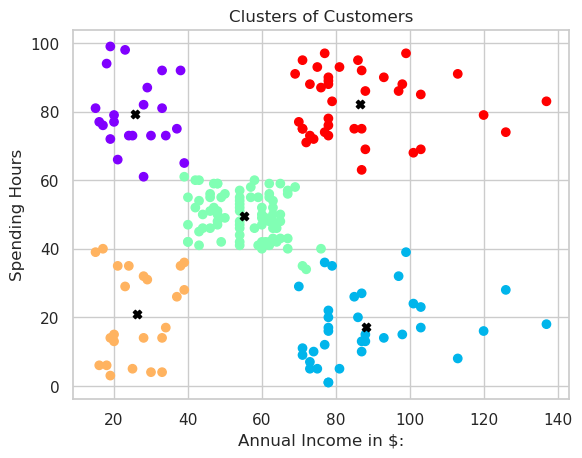

In [111]:
plt.scatter(X2[:,0], X2[:,1], c = kmeans.labels_, cmap="rainbow" )
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = "black",marker="X")

plt.title("Clusters of Customers")
plt.xlabel("Annual Income in $:")
plt.ylabel("Spending Hours")
plt.show()

# Clustering for Age, Spending hours and Annual Income

/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4

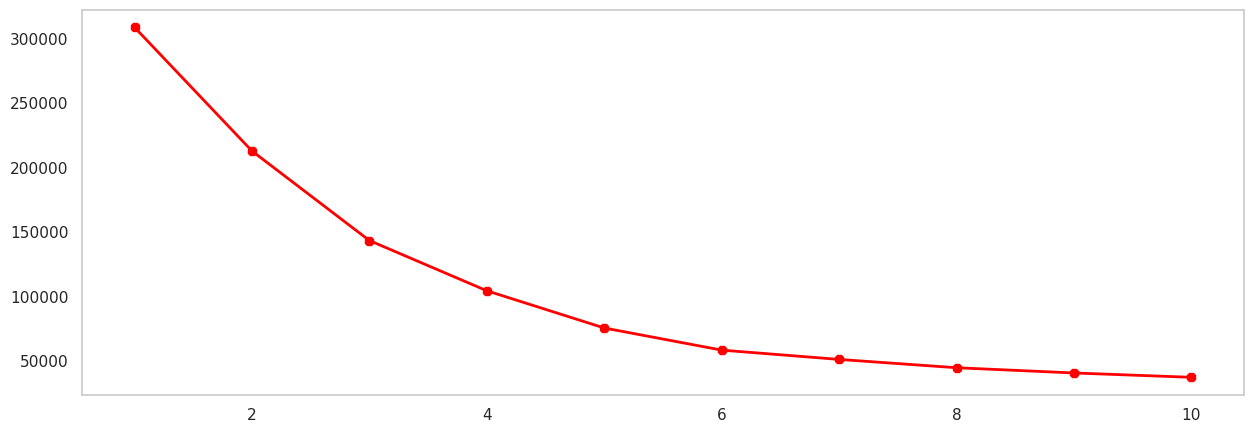

In [112]:
X3 = customer_data.loc[:,["Age","Spending Score (1-100)","Annual Income (k$)"]].values

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)  #This Calculates the WCSS

plt.figure(figsize = (15,5))
plt.grid()
plt.plot(range(1,11),wcss,linewidth = 2, color = "red", marker = "8")
plt.show()


In [113]:
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict(X3)
print(label)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 4 3 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 0 2 4 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/home/david/anaconda3/envs/CustomerSegmentation/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [115]:
print(kmeans.cluster_centers_)

[[40.32432432 18.18918919 87.43243243]
 [25.27272727 79.36363636 25.72727273]
 [32.69230769 82.12820513 86.53846154]
 [45.2173913  20.91304348 26.30434783]
 [43.12658228 49.83544304 54.82278481]]


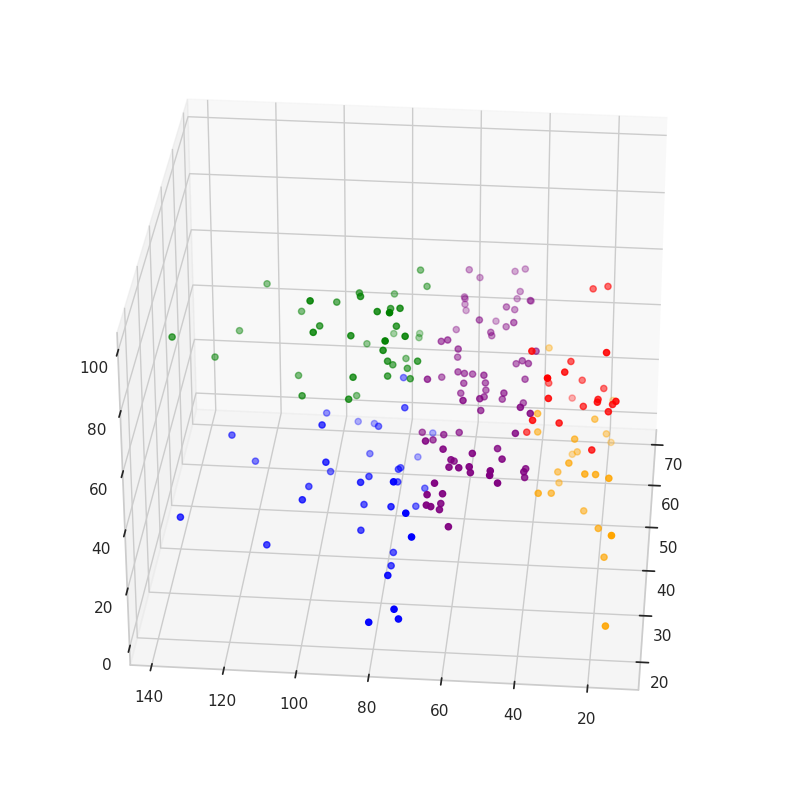

In [126]:
clusters = kmeans.labels_
customer_data["label"] = clusters

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(customer_data.Age[customer_data.label == 0],customer_data["Annual Income (k$)"][customer_data.label == 0],customer_data["Spending Score (1-100)"][customer_data.label == 0], c ="blue")
ax.scatter(customer_data.Age[customer_data.label == 1],customer_data["Annual Income (k$)"][customer_data.label == 1],customer_data["Spending Score (1-100)"][customer_data.label == 1], c="red")
ax.scatter(customer_data.Age[customer_data.label == 2],customer_data["Annual Income (k$)"][customer_data.label == 2],customer_data["Spending Score (1-100)"][customer_data.label == 2], c="green")
ax.scatter(customer_data.Age[customer_data.label == 3],customer_data["Annual Income (k$)"][customer_data.label == 3],customer_data["Spending Score (1-100)"][customer_data.label == 3],c="orange")
ax.scatter(customer_data.Age[customer_data.label == 4],customer_data["Annual Income (k$)"][customer_data.label == 4],customer_data["Spending Score (1-100)"][customer_data.label == 4],c = "purple")
ax.view_init(30,185)

